In [1]:
# Analysis

#1:Urban cities tend to have a higher number of rides per city at a lower average fare,
#  while rural cities tend to have a lower number of rides per city at a higher average fare.
#2:Cities with a lower number of drivers have a higher average fare.
#3:Rural cities also tend to have less drivers and riders than urban cities.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_all = pd.merge(city_data, ride_data , how="outer", on="city")
# Display the data table for preview
pyber_all.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


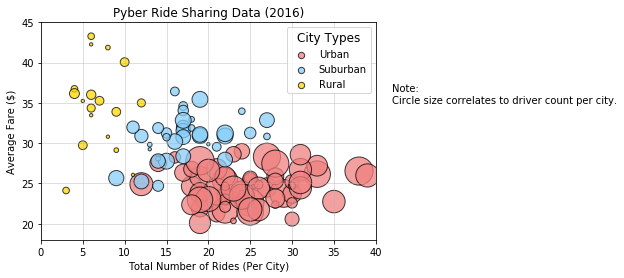

In [3]:
# Bubble Plot
# Obtain the x and y coordinates for each of the three city types
urban = pyber_all.loc[pyber_all['type'] == "Urban"]
suburban = pyber_all.loc[pyber_all['type'] == "Suburban"]
rural = pyber_all.loc[pyber_all['type'] == "Rural"]

urban_pool = urban.groupby(['city'])
suburban_pool = suburban.groupby(['city'])
rural_pool = rural.groupby(['city'])

urban_driver = urban_pool.ride_id.count()
suburban_driver = suburban_pool.ride_id.count()
rural_driver = rural_pool.ride_id.count()
urban_total_fares = urban_pool.fare.sum()
suburban_total_fares = suburban_pool.fare.sum()
rural_total_fares = rural_pool.fare.sum()

urban_avg_fare = urban_total_fares / urban_driver
suburban_avg_fare = suburban_total_fares / suburban_driver
rural_avg_fare = rural_total_fares / rural_driver

# Build the scatter plots for each city types
city_aggr = city_data.set_index(['city'])
city_new = city_data.sort_index()

urban_df = city_new.loc[city_new['type'] == "Urban"]
suburban_df = city_new.loc[city_new['type'] == "Suburban"]
rural_df = city_new.loc[city_new['type'] == "Rural"]

urban_bubble = urban_df['driver_count'] * 11
suburban_bubble = suburban_df['driver_count'] * 11
rural_bubble = rural_df['driver_count'] * 11

urban_plot = plt.scatter(urban_driver, urban_avg_fare, marker="o", c='lightcoral', edgecolors="black", s=urban_bubble, alpha=0.75, label="Urban")
suburban_plot = plt.scatter(suburban_driver, suburban_avg_fare, marker="o", c='lightskyblue', edgecolors="black", s=suburban_bubble, alpha=0.75, label="Suburban")
rural_plot = plt.scatter(rural_driver, rural_avg_fare, marker="o", c='gold', edgecolors="black", s=rural_bubble, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.xlim(0, 40)
plt.ylim(18, 45)
plt.grid(axis='both', alpha=0.5)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
lgnd.set_title("City Types", prop = {'size':'large'})

# Incorporate a text label regarding circle size
plt.text(x=42, y=35, s='Note:\nCircle size correlates to driver count per city.')

# Save Figure
plt.savefig("pyber_starter_plot.png")

# Show Figure
plt.show()

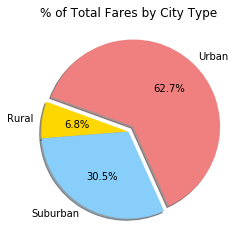

In [4]:
# Total Fares by City Type
# Calculate Type Percents
total_fare = pyber_all.groupby(['type'])['fare'].sum()

# Build Pie Chart
plt.title('% of Total Fares by City Type')

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.08)

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

# Show Figure
plt.show()

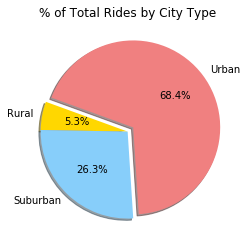

In [5]:
# Total Rides by City Type
# Calculate Ride Percents
total_rides = pyber_all.groupby(['type'])['ride_id'].count()

# Build Pie Chart
plt.title('% of Total Rides by City Type')

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.08)

plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")

# Show Figure
plt.show()

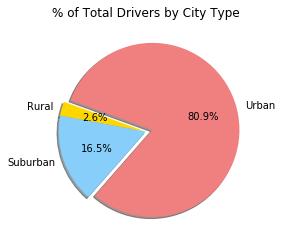

In [6]:
# Total Drivers by City Type
# Calculate Driver Percents
total_drivers = city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
plt.title('% of Total Drivers by City Type')

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.08)

plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Total_Drivers_by_City_Type.png")

# Show Figure
plt.show()